In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('/content/EDA-HEALTHCARE - EDA-HEALTHCARE.csv')


In [5]:
print("Univariate Non-Graphical EDA")


Univariate Non-Graphical EDA


In [6]:
print("Numerical Columns Summary:")
print(data.describe())


Numerical Columns Summary:
          PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.920000e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.0

In [7]:
print("\nCategorical Columns Summary:")
print(data.describe(include=['O']))


Categorical Columns Summary:
        Gender          ScheduledDay        AppointmentDay   Neighbourhood  \
count   110527                110527                110527          110527   
unique       2                103549                    27              81   
top          F  2016-05-06T07:09:54Z  2016-06-06T00:00:00Z  JARDIM CAMBURI   
freq     71840                    24                  4692            7717   

       No-show  
count   110527  
unique       2  
top         No  
freq     88208  


In [8]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


In [9]:
print("\nUnique values in categorical columns:")
for column in data.select_dtypes(include=['object']).columns:
    print(f"{column}: {data[column].nunique()} unique values")


Unique values in categorical columns:
Gender: 2 unique values
ScheduledDay: 103549 unique values
AppointmentDay: 27 unique values
Neighbourhood: 81 unique values
No-show: 2 unique values


In [10]:
print("\nMultivariate Non-Graphical EDA")



Multivariate Non-Graphical EDA


In [12]:
# Filter only numerical columns for correlation matrix
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate and print the correlation matrix for numerical columns
print("Correlation Matrix:")
correlation_matrix = numerical_data.corr()
print(correlation_matrix)


Correlation Matrix:
               PatientId  AppointmentID       Age  Scholarship  Hipertension  \
PatientId       1.000000       0.004039 -0.004139    -0.002880     -0.006441   
AppointmentID   0.004039       1.000000 -0.019126     0.022615      0.012752   
Age            -0.004139      -0.019126  1.000000    -0.092457      0.504586   
Scholarship    -0.002880       0.022615 -0.092457     1.000000     -0.019729   
Hipertension   -0.006441       0.012752  0.504586    -0.019729      1.000000   
Diabetes        0.001605       0.022628  0.292391    -0.024894      0.433086   
Alcoholism      0.011011       0.032944  0.095811     0.035022      0.087971   
Handcap        -0.007916       0.014106  0.078033    -0.008586      0.080083   
SMS_received   -0.009749      -0.256618  0.012643     0.001194     -0.006267   

               Diabetes  Alcoholism   Handcap  SMS_received  
PatientId      0.001605    0.011011 -0.007916     -0.009749  
AppointmentID  0.022628    0.032944  0.014106     -0.25

In [13]:
print("\nCrosstab of No-show vs Gender:")
print(pd.crosstab(data['No-show'], data['Gender'], normalize='index'))


Crosstab of No-show vs Gender:
Gender          F         M
No-show                    
No       0.648989  0.351011
Yes      0.653882  0.346118


In [14]:
print("\nCrosstab of No-show vs Age Groups:")
age_groups = pd.cut(data['Age'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '65+'])
print(pd.crosstab(data['No-show'], age_groups, normalize='index'))


Crosstab of No-show vs Age Groups:
Age          0-18     19-35     36-50     51-65      65+
No-show                                                 
No       0.229992  0.215514  0.206417  0.216417  0.13166
Yes      0.263321  0.265397  0.207224  0.168889  0.09517


In [15]:
print("\nUnivariate Graphical EDA")



Univariate Graphical EDA


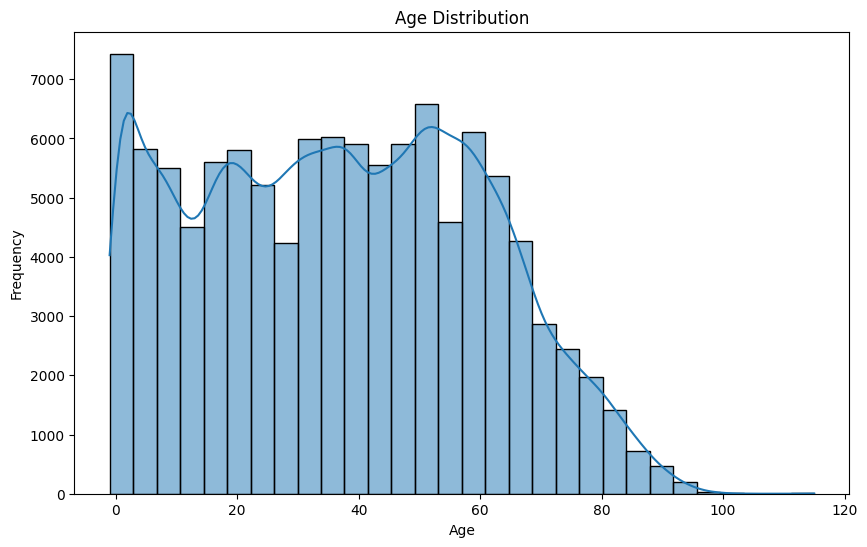

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(data['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

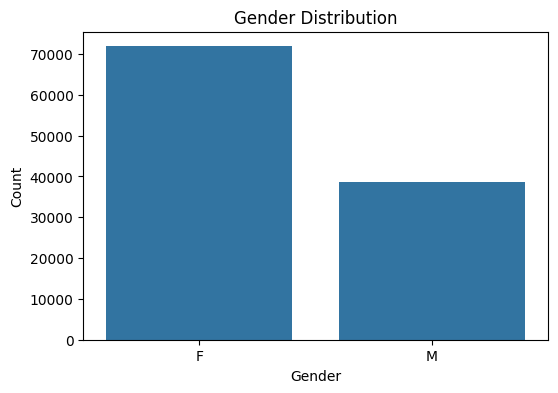

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


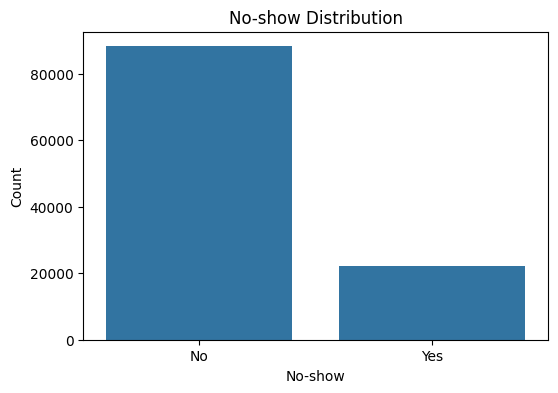

In [18]:
# No-show distribution
plt.figure(figsize=(6,4))
sns.countplot(x='No-show', data=data)
plt.title('No-show Distribution')
plt.xlabel('No-show')
plt.ylabel('Count')
plt.show()

In [19]:
print("\nMultivariate Graphical EDA")



Multivariate Graphical EDA


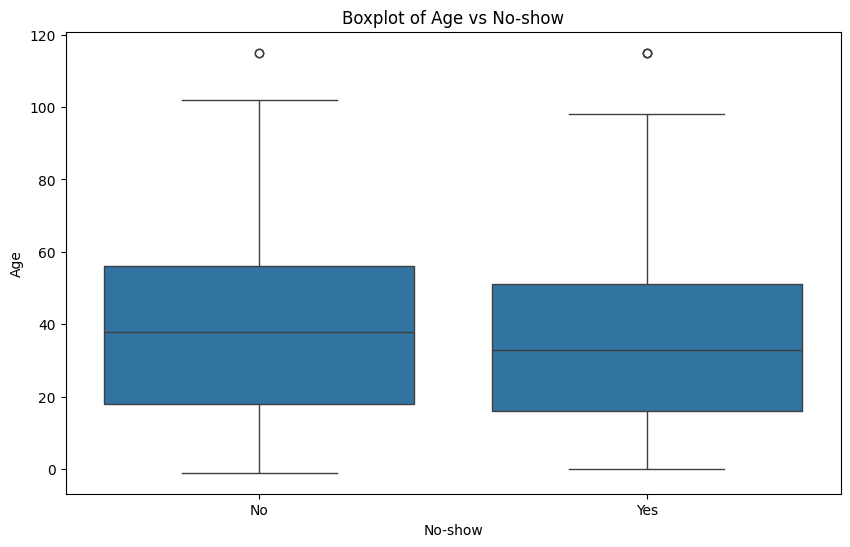

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(x='No-show', y='Age', data=data)
plt.title('Boxplot of Age vs No-show')
plt.show()

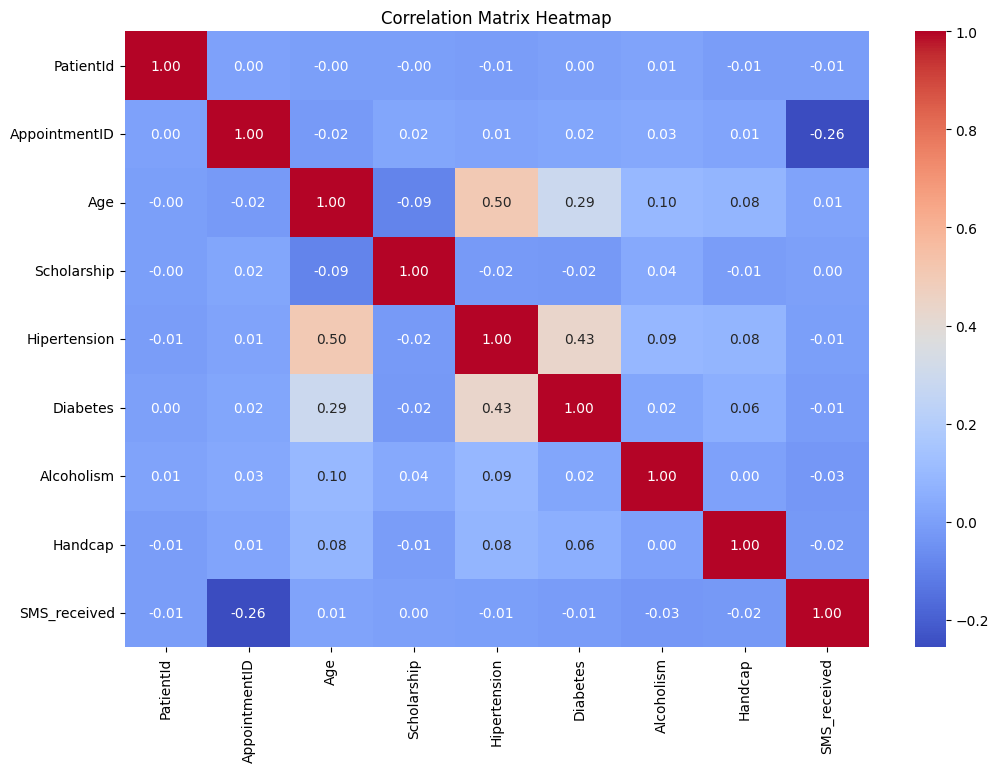

In [21]:
# Heatmap of the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


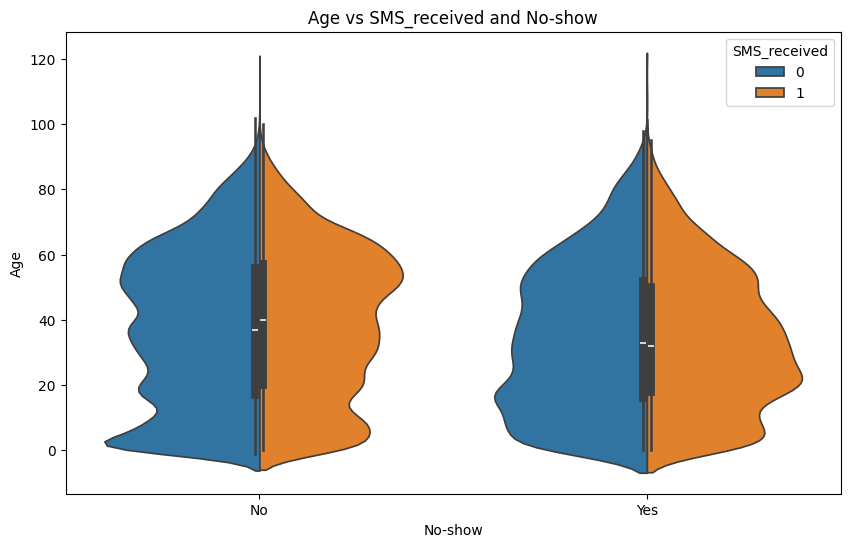

In [22]:
# Age vs SMS_received and No-show
plt.figure(figsize=(10,6))
sns.violinplot(x='No-show', y='Age', hue='SMS_received', data=data, split=True)
plt.title('Age vs SMS_received and No-show')
plt.show()

In [23]:
plt.savefig('eda_healthcare_visualizations.png')

<Figure size 640x480 with 0 Axes>